EDA ---------------------------------------- DATA ANALISIS EXPLORATORY


In [46]:
import pandas as pd

# Cargar el archivo Excel
file_path = 'Internet.xlsx'
xls = pd.ExcelFile(file_path)

# Listar las hojas del archivo Excel
sheet_names = xls.sheet_names
sheet_names


['Acc_vel_loc_sinrangos',
 'Velocidad_sin_Rangos',
 'Accesos_tecnologia_localidad',
 'Velocidad % por prov',
 'Totales VMD',
 'Totales Accesos Por Tecnología',
 'Accesos Por Tecnología',
 'Penetración-poblacion',
 'Penetracion-hogares',
 'Penetracion-totales',
 'Totales Accesos por velocidad',
 'Accesos por velocidad',
 'Dial-BAf',
 'Totales Dial-BAf',
 'Ingresos ']

ESTOS SON LOS NOMBRES DE CADA HOJA DE MI ARCHIVO EXCEL PROCEDERE A REALIZAR UN ANALISIS EXPLORATORIO PARA CADA HOJA 

In [47]:
# Cargar la primera hoja
data_acc_vel_loc = pd.read_excel(file_path, sheet_name='Acc_vel_loc_sinrangos')

# Mostrar las primeras filas
data_acc_vel_loc.head()


,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,2.0,NaN,19.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


La hoja Acc_vel_loc_sinrangos contiene datos sobre velocidades de acceso a internet en diferentes localidades de la provincia de Buenos Aires.

Columnas principales:
Provincia, Partido, Localidad: Información geográfica.
Link Indec: Un identificador único.
Varias columnas representan diferentes velocidades de internet (ej. 0,256 Mbps, 0,5 Mbps, etc.).
La hoja tiene 125 columnas en total, lo que nos dice que hay muchas velocidades diferentes registradas.

Analizare los valores faltantes


La mayoría de las columnas de velocidad tienen una cantidad significativa de valores faltantes.

In [4]:
# Verificar registros duplicados
duplicates_acc_vel_loc = data_acc_vel_loc.duplicated().sum()
duplicates_acc_vel_loc


0

No hay registros duplicados en la hoja Acc_vel_loc_sinrangos.

A continuacion identificaremos los valores atípicos (outliers) utilizaremos boxplots en algunas de las columnas de velocidad.

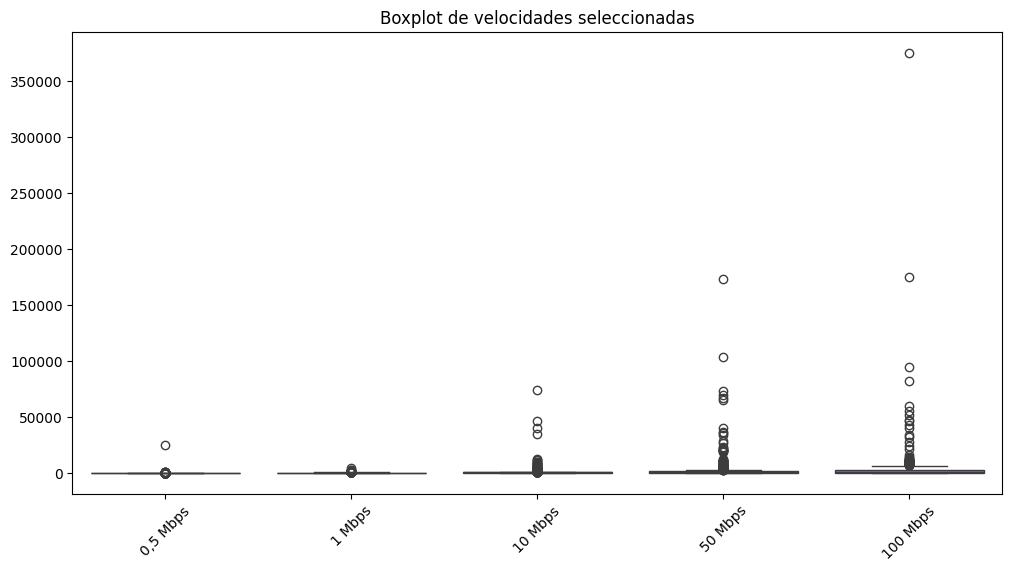

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar algunas columnas de velocidad para visualización
selected_columns = ['0,5 Mbps', '1 Mbps', '10 Mbps', '50 Mbps', '100 Mbps']

# Boxplot para columnas seleccionadas
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_acc_vel_loc[selected_columns])
plt.title('Boxplot de velocidades seleccionadas')
plt.xticks(rotation=45)
plt.show()


Grafico boxplot para las velocidades de internet de 0.5, 1, 10, 50 y 100 Mbps. Este gráfico muestra la distribución de la cantidad de conexiones a internet para cada una de estas velocidades en las localidades del dataset.

Observaciones del Boxplot
Velocidades más bajas (0.5 y 1 Mbps): Las cajas están cerca o en el nivel cero, indicando pocas conexiones a estas velocidades, con solo algunos outliers que representan localidades con más conexiones.
Velocidad media (10 y 50 Mbps): Hay más variabilidad en la cantidad de conexiones a estas velocidades, con varios outliers que indican localidades con conexiones relativamente altas.
Velocidad alta (100 Mbps): Similar a las velocidades de 10 y 50 Mbps, hay una serie de valores atípicos que muestran un número más significativo de conexiones en algunas localidades, aunque la mediana sigue siendo baja.

In [18]:
import pandas as pd

# Cargar el archivo Excel
file_path = 'Internet.xlsx'
data = pd.read_excel(file_path)

# agrupar por provincia y calcular el total de conexiones
conexiones_por_provincia = data.drop(columns=['Partido', 'Localidad', 'Link Indec', 'Otros']).groupby('Provincia').sum()

# Calcular el total de conexiones por provincia
conexiones_por_provincia['Total Conexiones'] = conexiones_por_provincia.sum(axis=1)

# Mostrar el resumen de conexiones por provincia
conexiones_por_provincia.reset_index(inplace=True)
conexiones_por_provincia[['Provincia', 'Total Conexiones']].sort_values(by='Total Conexiones', ascending=False)


,Provincia,Total Conexiones
0,BUENOS AIRES,4919410.0
1,CABA,1504711.0
5,CORDOBA,1067489.0
20,SANTA FE,902420.0
12,MENDOZA,297031.0
7,ENTRE RIOS,282577.0
23,TUCUMAN,264107.0
16,SALTA,196215.0
13,MISIONES,194030.0
15,RIO NEGRO,155443.0


Provincias con Mayor Número de Conexiones

Buenos Aires: Con 4,919,410 conexiones, Buenos Aires lidera significativamente en la cantidad total de conexiones. Esto puede atribuirse a su gran población y su importancia económica como uno de los principales centros urbanos del país.

CABA (Ciudad Autónoma de Buenos Aires): Con 1,504,711 conexiones, es la segunda con más conexiones, lo que refleja su alto grado de urbanización y conectividad.

Córdoba: Con 1,067,489 conexiones, Córdoba es la tercera provincia con más conexiones, mostrando una infraestructura de internet bastante desarrollada.

Santa Fe: Con 902,420 conexiones, es la cuarta provincia en términos de conexiones, lo que sugiere una buena infraestructura digital.

Provincias con Menor Número de Conexiones

Santa Cruz: Con solo 46,405 conexiones, tiene el menor número de conexiones, lo que podría indicar una menor densidad de población o desafíos en la infraestructura de internet.

Tierra del Fuego: Con 54,434 conexiones, también presenta un bajo número de conexiones, posiblemente debido a su ubicación geográfica y menor densidad poblacional.

Formosa y Catamarca: Ambas provincias tienen menos de 75,000 conexiones, lo que puede reflejar desafíos similares en términos de infraestructura y densidad de población.

Conclusiones
Disparidad Regional: Hay una clara disparidad en la disponibilidad de conexiones de internet entre las provincias más urbanizadas y densamente pobladas (como Buenos Aires y CABA) y las más remotas o menos pobladas (como Santa Cruz y Tierra del Fuego).

Infraestructura Urbana vs. Rural: Las provincias más urbanas tienden a tener una infraestructura de internet más desarrollada, lo que podría estar impulsado por la demanda en áreas con una mayor densidad de población y actividad económica.

Oportunidades de Mejora: Las provincias con menos conexiones podrían beneficiarse de inversiones en infraestructura de telecomunicaciones para mejorar la conectividad, lo que podría tener impactos positivos en el desarrollo económico y social.

Foco en Expansión: Para reducir la brecha digital, las políticas podrían centrarse en expandir la infraestructura de internet en las regiones menos conectadas, proporcionando incentivos para que los proveedores de servicios de internet inviertan en estas áreas.

In [24]:
import pandas as pd

# Cargar el archivo Excel
file_path = 'Internet.xlsx'
data = pd.read_excel(file_path)

# Seleccionar solo las columnas de velocidades
velocidades = data.drop(columns=['Provincia', 'Partido', 'Localidad', 'Link Indec', 'Otros'])

# Calcular la suma de conexiones para cada velocidad
suma_conexiones = velocidades.sum().sort_values(ascending=False)

# Seleccionar las 10 velocidades más comunes
top_10_velocidades = suma_conexiones.head(10).index
velocidades_top_10 = velocidades[top_10_velocidades]

top_10_velocidades, velocidades_top_10.head()



(Index(['300 Mbps', '100 Mbps', '50 Mbps', '30 Mbps', '10 Mbps', '150 Mbps',
        '6 Mbps', '500 Mbps', '20 Mbps', '15 Mbps'],
       dtype='object'),
    300 Mbps  100 Mbps  50 Mbps  30 Mbps  10 Mbps  150 Mbps  6 Mbps  500 Mbps  \
 0      95.0     693.0    647.0   1501.0    288.0       NaN    76.0       3.0   
 1       NaN       NaN      NaN      NaN     59.0       NaN     NaN       NaN   
 2       NaN       NaN      NaN      NaN     10.0       NaN     NaN       NaN   
 3       NaN       NaN      NaN      NaN      NaN       NaN     NaN       NaN   
 4       NaN       NaN      NaN      NaN      1.0       NaN     3.0       NaN   
 
    20 Mbps  15 Mbps  
 0   1797.0    415.0  
 1      5.0      NaN  
 2      NaN      NaN  
 3      NaN      NaN  
 4      NaN      NaN  )

Aqui lo que hago es seleccionar las 10 velocidades mas comunes en todo el dataset para realizar un mapa de correlacion con las velocidades ya que si usamos todo el dataset de velocidades es imposible visualizar algun tipo de informacion o relacion por la cantidad de datos 

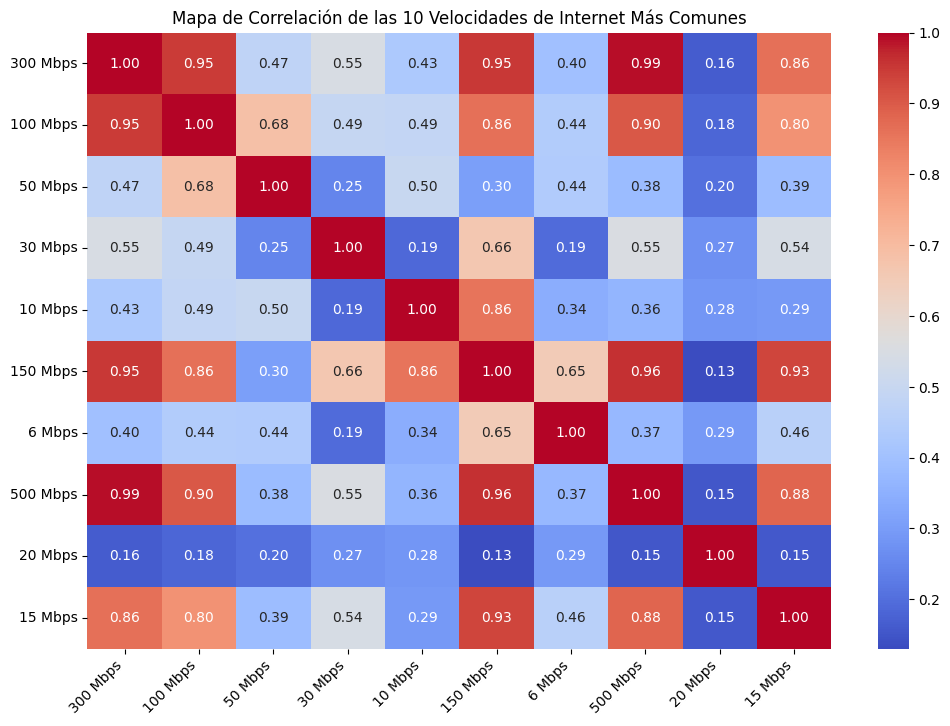

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación para las 10 velocidades más comunes
corr_top_10 = velocidades_top_10.corr()

# Crear un mapa de calor para visualizar la correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_top_10, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Mapa de Correlación de las 10 Velocidades de Internet Más Comunes")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


Análisis de Resultados del Mapa de Correlación

Alta Correlación:
Velocidades Altas: Velocidades como 300 Mbps, 500 Mbps y 150 Mbps muestran una alta correlación entre sí, lo que sugiere que las zonas donde una de estas velocidades es común también tienden a tener disponibilidad de las otras.
Velocidades Moderadas a Altas: Las velocidades de 100 Mbps y 50 Mbps también están altamente correlacionadas, indicando que probablemente provienen de áreas con infraestructura de internet bien desarrollada.

Correlaciones Moderadas:
Variabilidad entre Velocidades Moderadas: Velocidades como 30 Mbps, 20 Mbps, y 15 Mbps presentan correlaciones moderadas entre ellas y con otras velocidades, lo que puede reflejar una oferta más diversificada de servicios de internet que no depende únicamente de la infraestructura de gama alta.

Bajas Correlaciones:
6 Mbps y Velocidades Altas: La velocidad de 6 Mbps tiene generalmente bajas correlaciones con velocidades más altas, lo que podría indicar que esta velocidad se encuentra en áreas con acceso limitado o antiguo a servicios de internet.

Conclusiones:
Desarrollo de Infraestructura: Las áreas que solo tienen acceso a velocidades más bajas como 6 Mbps, 20 Mbps y 15 Mbps podrían beneficiarse de inversiones en infraestructura para mejorar el acceso a servicios de internet más rápidos.

Este análisis te proporciona una base sólida para comprender mejor la distribución y la demanda potencial de diferentes velocidades de internet. Podría ser útil para informar decisiones relacionadas con mejoras en infraestructura, campañas de marketing, y políticas públicas dirigidas a mejorar la conectividad en regiones menos desarrolladas.

In [26]:
import pandas as pd

# Cargar el archivo Excel
file_path = 'Internet.xlsx'
data = pd.read_excel(file_path)

# Suponiendo que las columnas de interés son velocidades como '50 Mbps', '100 Mbps', etc.
columns_of_interest = ['50 Mbps', '100 Mbps', '300 Mbps', '6 Mbps']  # Ajusta según tus columnas
speed_data = data[columns_of_interest]

# Obtener estadísticas descriptivas
descriptive_stats = speed_data.describe()
print(descriptive_stats)

# Calcular otras estadísticas
variance = speed_data.var()
skewness = speed_data.skew()
kurtosis = speed_data.kurt()

print("Varianza:\n", variance)
print("Asimetría:\n", skewness)
print("Curtosis:\n", kurtosis)


             50 Mbps       100 Mbps       300 Mbps        6 Mbps
count     762.000000     623.000000     445.000000   1347.000000
mean     2099.958005    3581.173355    5058.258427    234.573125
std      9563.341960   18193.245326   27392.599391    774.654364
min         1.000000       0.000000       1.000000      1.000000
25%        19.250000      27.000000     429.000000      9.000000
50%       187.500000     621.000000    1651.000000     43.000000
75%      1055.500000    2581.000000    4001.000000    159.500000
max    173536.000000  375600.000000  553467.000000  14510.000000
Varianza:
 50 Mbps     9.145751e+07
100 Mbps    3.309942e+08
300 Mbps    7.503545e+08
6 Mbps      6.000894e+05
dtype: float64
Asimetría:
 50 Mbps     11.281708
100 Mbps    15.664037
300 Mbps    18.379708
6 Mbps      10.227550
dtype: float64
Curtosis:
 50 Mbps     163.684619
100 Mbps    295.575408
300 Mbps    364.538708
6 Mbps      143.887401
dtype: float64


In [27]:
import pandas as pd

# Cargar el archivo Excel con la hoja específica "Velocidad % por prov"
file_path = 'Internet.xlsx'
data_vel_prov = pd.read_excel(file_path, sheet_name='Velocidad % por prov')

# Mostrar las primeras filas del DataFrame para revisar la estructura de los datos
data_vel_prov.head()


,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,1,Buenos Aires,159.13
1,2024,1,Capital Federal,229.94
2,2024,1,Catamarca,91.45
3,2024,1,Chaco,107.51
4,2024,1,Chubut,20.50


In [28]:
# Calcular estadísticas descriptivas para la columna 'Mbps (Media de bajada)'
descriptive_stats = data_vel_prov['Mbps (Media de bajada)'].describe()
print(descriptive_stats)


count    984.000000
mean      23.186898
std       31.623977
min        2.573729
25%        4.762379
50%        9.307228
75%       27.636730
max      234.440000
Name: Mbps (Media de bajada), dtype: float64


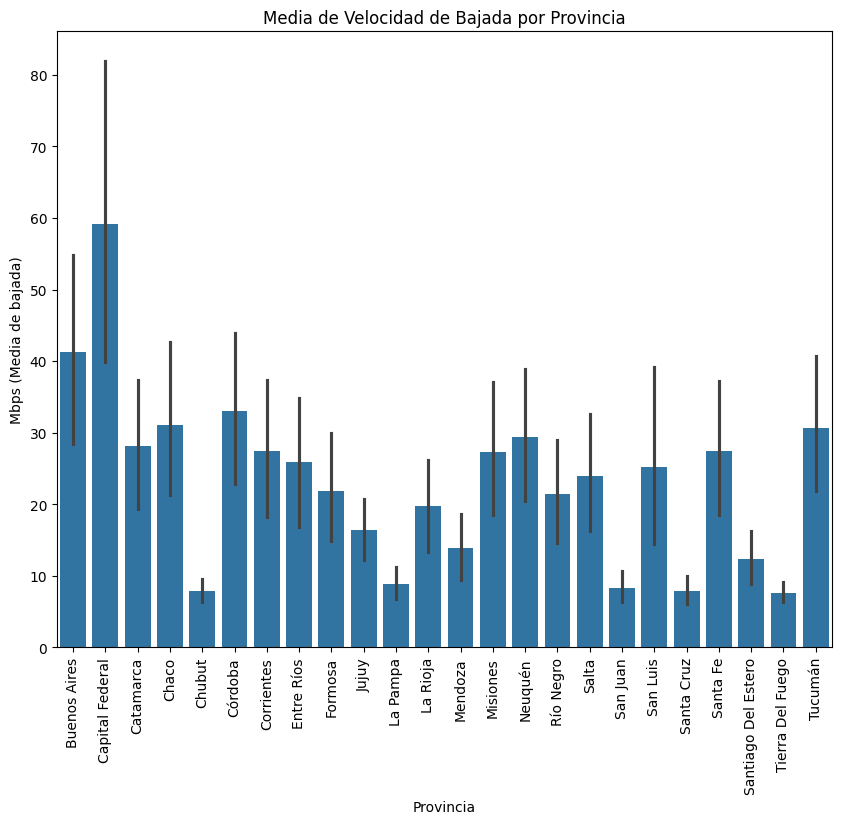

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de barras para las velocidades medias de bajada por provincia
plt.figure(figsize=(10, 8))
sns.barplot(x='Provincia', y='Mbps (Media de bajada)', data=data_vel_prov)
plt.xticks(rotation=90)  # Rotar las etiquetas para mejor legibilidad
plt.title('Media de Velocidad de Bajada por Provincia')
plt.ylabel('Mbps (Media de bajada)')
plt.xlabel('Provincia')
plt.show()


Análisis de las Estadísticas Descriptivas

Media (23.19 Mbps): La velocidad media de bajada a nivel nacional es de 23.19 Mbps, lo cual puede considerarse moderado dependiendo de los estándares y necesidades locales.
Desviación Estándar (31.62 Mbps): Hay una alta variabilidad en las velocidades de internet entre las provincias, como lo indica la desviación estándar. Esto sugiere una disparidad significativa en la calidad del servicio de internet.
Mínimo y Máximo (2.57 - 234.44 Mbps): El rango de velocidades es muy amplio, con algunas provincias alcanzando velocidades de bajada extremadamente altas, mientras que otras están considerablemente más bajas.

Observaciones del Gráfico de Barras

Altas Variabilidades: Las barras de error en el gráfico indican variaciones significativas dentro de las provincias, sugiriendo que incluso dentro de las provincias, hay grandes diferencias en la velocidad de internet que pueden estar influenciadas por factores urbanos/rurales o por la infraestructura disponible.
Provincias como Buenos Aires y Capital Federal: Estas provincias muestran una media más alta de velocidad de bajada, lo cual es esperado debido a su mayor desarrollo urbano y concentración de infraestructura.
Provincias con Velocidades Bajas: Provincias como Chubut y algunas otras muestran medias considerablemente más bajas y altas variabilidades, lo que podría indicar una falta de acceso uniforme a internet de alta velocidad.
Conclusiones Generales
Mejora en la Infraestructura: Las provincias con velocidades bajas y alta variabilidad son candidatas clave para el mejoramiento de la infraestructura de telecomunicaciones.


In [30]:
import pandas as pd

# Carga de los datos
file_path = 'Internet.xlsx'
data = pd.read_excel(file_path, sheet_name='Velocidad % por prov')

# Calcular la media de velocidad para cada provincia y ordenar
provincia_velocidad_media = data.groupby('Provincia')['Mbps (Media de bajada)'].mean().sort_values()

# Identificar las 5 provincias más y menos desarrolladas
top_5_desarrolladas = provincia_velocidad_media[-5:].index.tolist()
bottom_5_desarrolladas = provincia_velocidad_media[:5].index.tolist()

top_5_desarrolladas, bottom_5_desarrolladas


(['Tucumán', 'Chaco', 'Córdoba', 'Buenos Aires', 'Capital Federal'],
 ['Tierra Del Fuego', 'Chubut', 'Santa Cruz', 'San Juan', 'La Pampa'])

En este analisis voy a extraer las 5 provincias con velocidades mas altas y las que tengan velocidades mas bajas, voy a interpretar las altas velocidades medias como provincias con una infraestructura mas desarrollada y del mismo  modo para 5 provincias con velocidades medias mas bajas interpretando que su estructura es la menos desarrollada

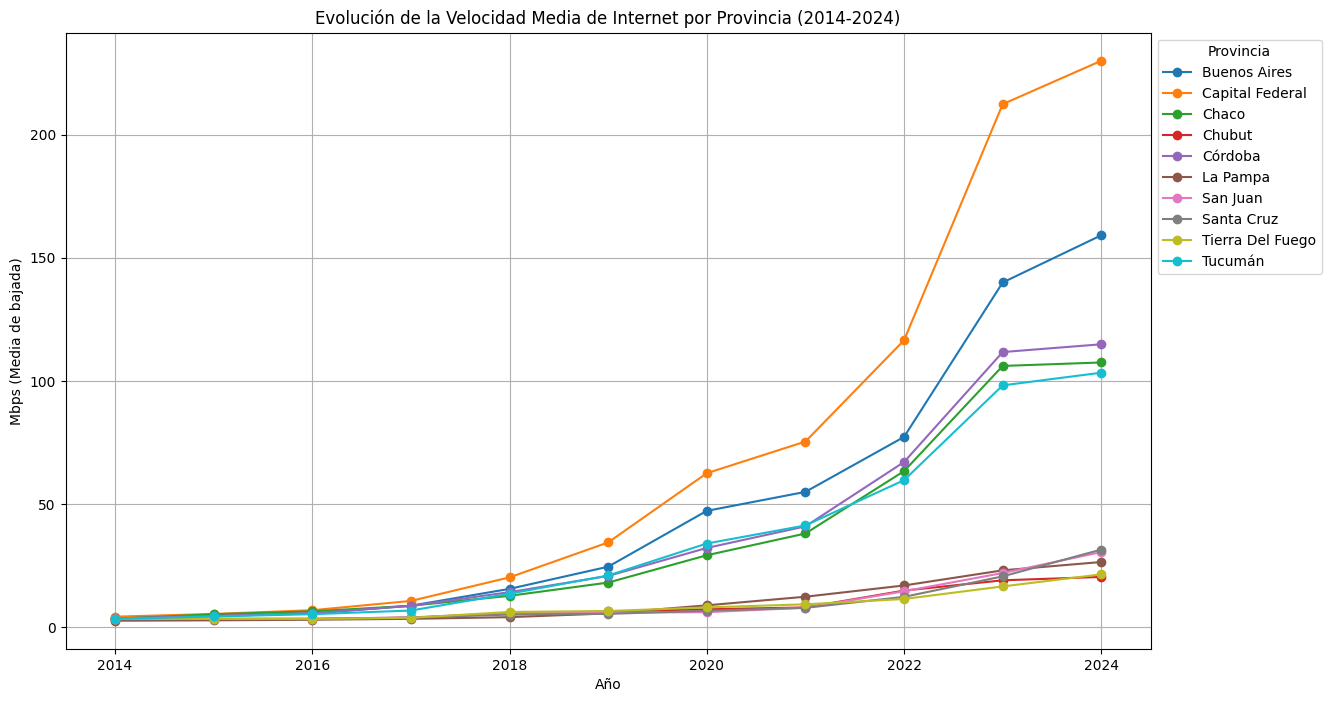

In [31]:
# Filtrar los datos para estas provincias y para los años desde 2014 a 2024
selected_provinces = top_5_desarrolladas + bottom_5_desarrolladas
filtered_data = data[data['Provincia'].isin(selected_provinces) & (data['Año'] >= 2014)]

# Calcular la media de velocidad por año y provincia
grouped_data = filtered_data.groupby(['Provincia', 'Año'])['Mbps (Media de bajada)'].mean().unstack()

# Visualización con gráficos de líneas
plt.figure(figsize=(14, 8))
for province in grouped_data.index:
    plt.plot(grouped_data.columns, grouped_data.loc[province], marker='o', label=province)
plt.title('Evolución de la Velocidad Media de Internet por Provincia (2014-2024)')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(title='Provincia', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

Conclusiones del Análisis Temporal

Todas las provincias muestran un aumento en la velocidad media de bajada a lo largo del tiempo, lo que sugiere mejoras en la infraestructura de internet a nivel nacional.

Capital Federal y Buenos Aires: muestran un crecimiento notable en las velocidades de internet, especialmente después del 2020. Este aumento puede estar vinculado a inversiones significativas en infraestructura, como la expansión de la fibra óptica.

Chubut y Tucumán: Aunque estas provincias comenzaron con velocidades más bajas, muestran un crecimiento constante, indicando mejoras graduales en la accesibilidad y calidad del internet.

Aunque todas las provincias han experimentado mejoras, la brecha entre las provincias con mayor y menor velocidad sigue siendo notable. Capital Federal destaca con velocidades significativamente más altas en comparación con provincias como Chubut y Tucumán hacia el 2024.

Desde el 2020, se observa una aceleración en el crecimiento de la velocidad en varias provincias, lo que podría correlacionarse con políticas específicas, avances tecnológicos o mayor inversión en la infraestructura digital debido a la creciente demanda impulsada por cambios como el aumento del trabajo remoto y la educación en línea.

In [32]:
import pandas as pd

# Cargar el archivo Excel con la hoja específica "Accesos Por Tecnología"
file_path = 'Internet.xlsx'
data_tech_access = pd.read_excel(file_path, sheet_name='Accesos Por Tecnología')

# Mostrar las primeras filas del DataFrame para revisar la estructura de los datos
data_tech_access.head()


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0


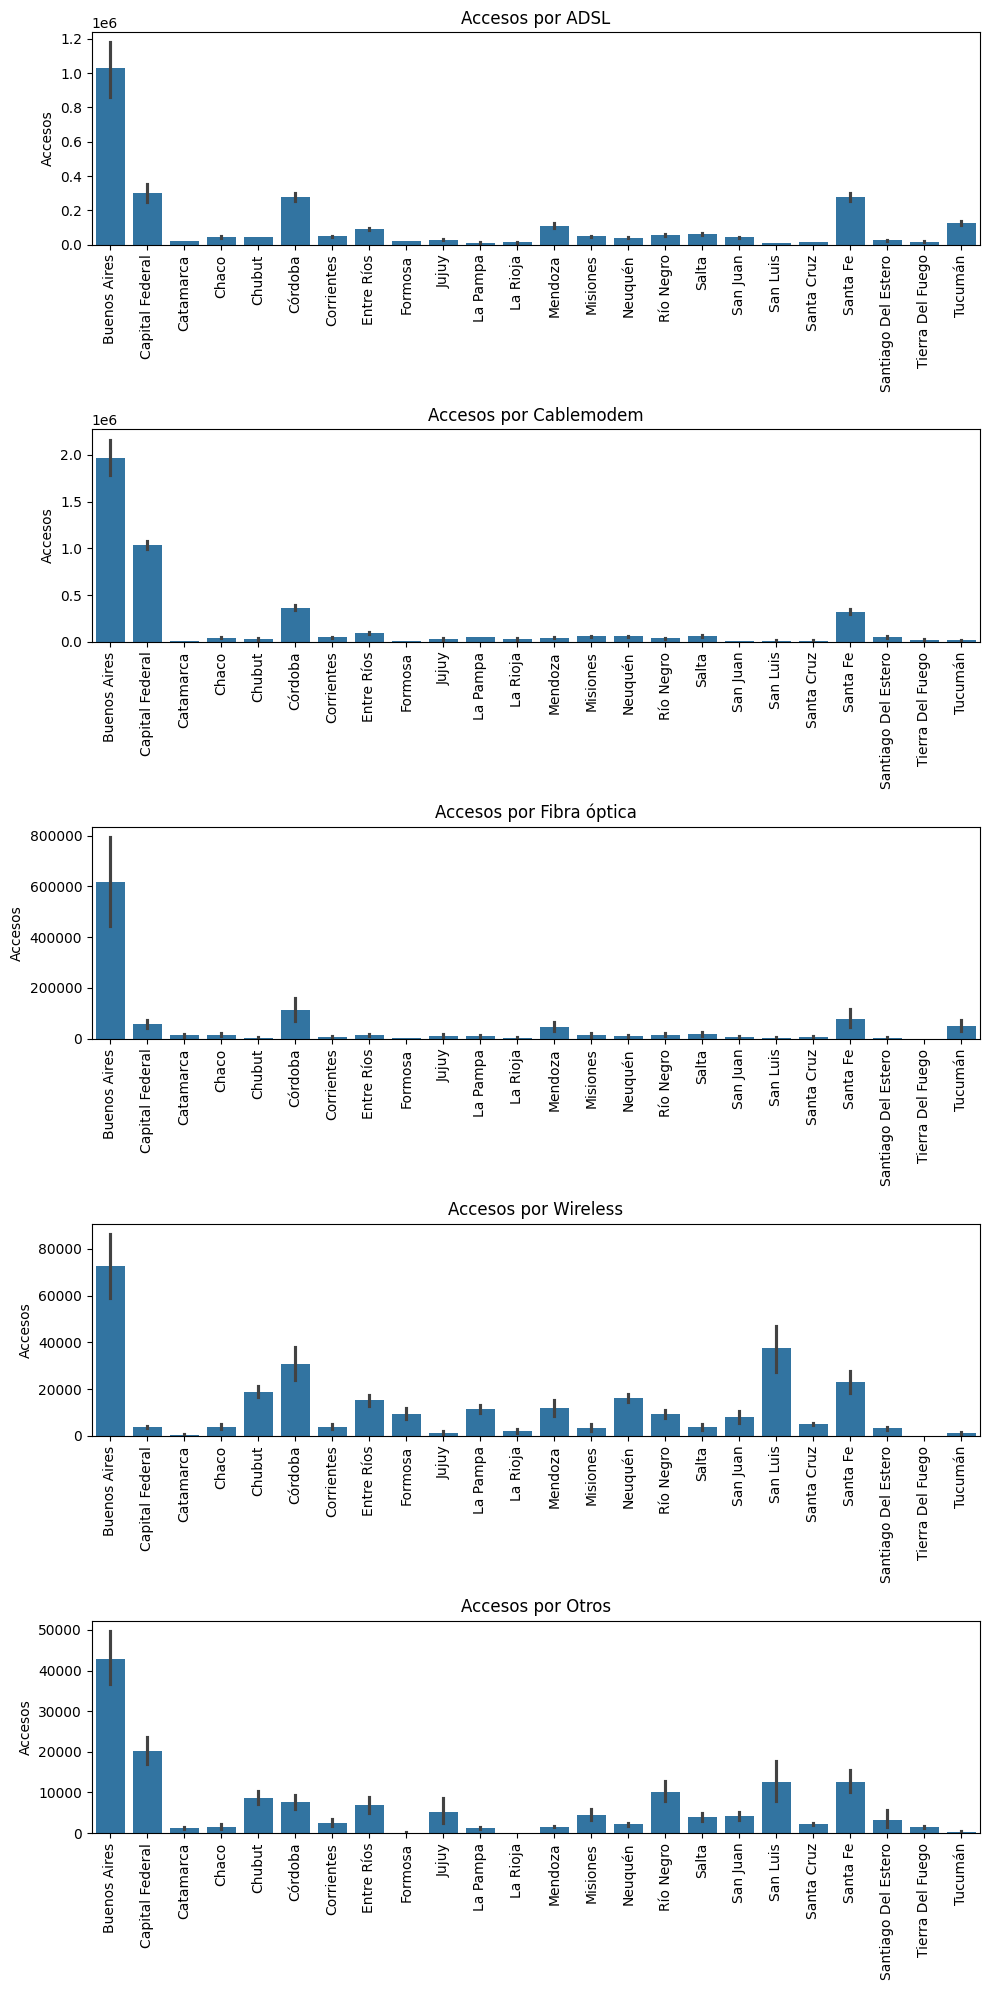

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que data_tech_access es tu DataFrame
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 20))

technologies = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
for i, tech in enumerate(technologies):
    sns.barplot(x='Provincia', y=tech, data=data_tech_access, ax=axes[i])
    axes[i].set_title(f'Accesos por {tech}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Accesos')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


Análisis de los Gráficos
ADSL:
Buenos Aires y Capital Federal muestran los números más altos de accesos por ADSL, lo que indica una presencia significativa de esta tecnología en áreas urbanas grandes.
Otras provincias muestran niveles mucho más bajos, lo que podría indicar una transición hacia tecnologías más modernas o limitaciones en la infraestructura de ADSL.

Cablemodem:
Nuevamente, Buenos Aires y Capital Federal destacan, reflejando un uso más extendido del cablemodem en áreas urbanizadas.
La presencia en otras provincias es relativamente baja, lo que sugiere que podría no ser la principal forma de acceso a internet en áreas menos urbanizadas.

Fibra Óptica:
Esta tecnología muestra una concentración muy alta en Capital Federal, indicando una fuerte inversión en infraestructura de fibra óptica en esta área.
Buenos Aires sigue a Capital Federal, pero con una cantidad significativamente menor, aunque sigue siendo la segunda provincia en adopción de fibra óptica.

Wireless:
La distribución de accesos por tecnología inalámbrica es más uniforme en comparación con las tecnologías con cable. Buenos Aires lidera, pero otras provincias como Santa Fe y Córdoba también muestran números considerables.
Esto puede reflejar la adopción de tecnologías inalámbricas como una solución viable en áreas donde la infraestructura cableada es menos desarrollada.

Otros:
'Otros' muestra una cantidad significativa de accesos en Buenos Aires, lo que podría incluir tecnologías emergentes o menos comunes.
La presencia en otras provincias varía, sugiriendo una posible experimentación o adopción temprana de nuevas tecnologías en algunas áreas.

In [48]:
import pandas as pd

# Cargar el archivo Excel con los datos
file_path = 'Internet.xlsx'
data_tech_access = pd.read_excel(file_path, sheet_name='Accesos Por Tecnología')

# Mostrar las primeras filas para asegurarnos de que se han cargado correctamente los datos
data_tech_access.head()


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0


In [49]:
# Agrupar por Provincia, Año y Tecnología, y calcular la suma de conexiones
grouped_data = data_tech_access.groupby(['Provincia', 'Año'])[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

# Reiniciar el índice para trabajar más fácilmente con el DataFrame
grouped_data = grouped_data.reset_index()

# Mostrar las primeras filas del DataFrame agrupado
grouped_data.head()


,Provincia,Año,ADSL,Cablemodem,Fibra óptica,Wireless,Otros
0,Buenos Aires,2014,6275077.0,4207132.0,485970.0,71325.0,130890.0
1,Buenos Aires,2015,6336715.0,4645385.0,466696.0,78408.0,106578.0
2,Buenos Aires,2016,6300766.0,5277254.0,456511.0,82532.0,100036.0
3,Buenos Aires,2017,5466924.0,6290047.0,494072.0,137895.0,118925.0
4,Buenos Aires,2018,5643696.0,7480662.0,730038.0,263430.0,105202.0


In [51]:
import numpy as np

# Reemplazar los valores no numéricos en la columna "Año"
grouped_data['Año'] = pd.to_numeric(grouped_data['Año'], errors='coerce')

# Eliminar filas donde "Año" es NaN
grouped_data = grouped_data.dropna(subset=['Año'])

# Convertir "Año" a tipo int
grouped_data['Año'] = grouped_data['Año'].astype(int)

# Verificar que todo esté en orden
grouped_data.head()


C:\Users\germa\AppData\Local\Temp\ipykernel_5404\2249894336.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_data['Año'] = grouped_data['Año'].astype(int)


,Provincia,Año,ADSL,Cablemodem,Fibra óptica,Wireless,Otros
0,Buenos Aires,2014,6275077.0,4207132.0,485970.0,71325.0,130890.0
1,Buenos Aires,2015,6336715.0,4645385.0,466696.0,78408.0,106578.0
2,Buenos Aires,2016,6300766.0,5277254.0,456511.0,82532.0,100036.0
3,Buenos Aires,2017,5466924.0,6290047.0,494072.0,137895.0,118925.0
4,Buenos Aires,2018,5643696.0,7480662.0,730038.0,263430.0,105202.0


C:\Users\germa\AppData\Local\Temp\ipykernel_5404\4212830982.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023[tech] += data_2024.groupby('Provincia')[tech].sum()
C:\Users\germa\AppData\Local\Temp\ipykernel_5404\4212830982.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023[tech] += data_2024.groupby('Provincia')[tech].sum()
C:\Users\germa\AppData\Local\Temp\ipykernel_5404\4212830982.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

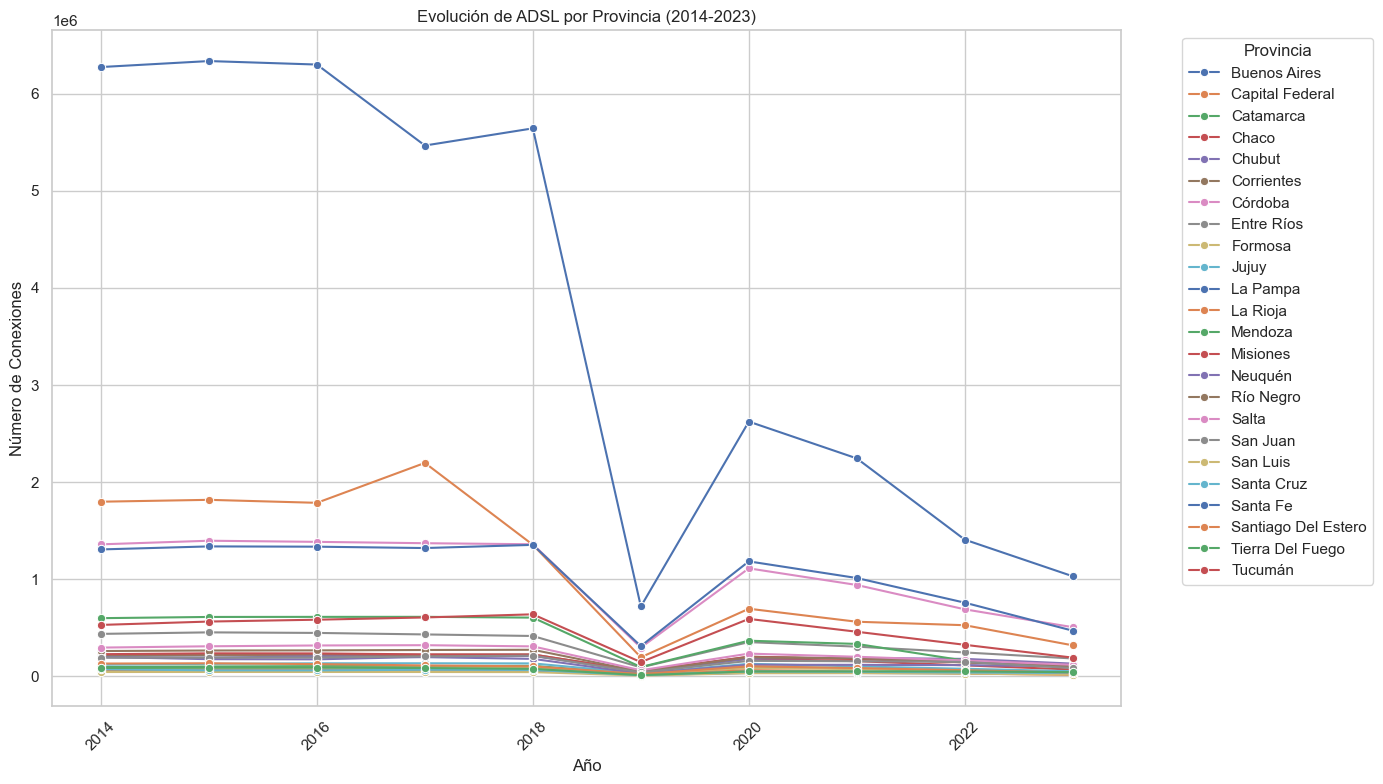

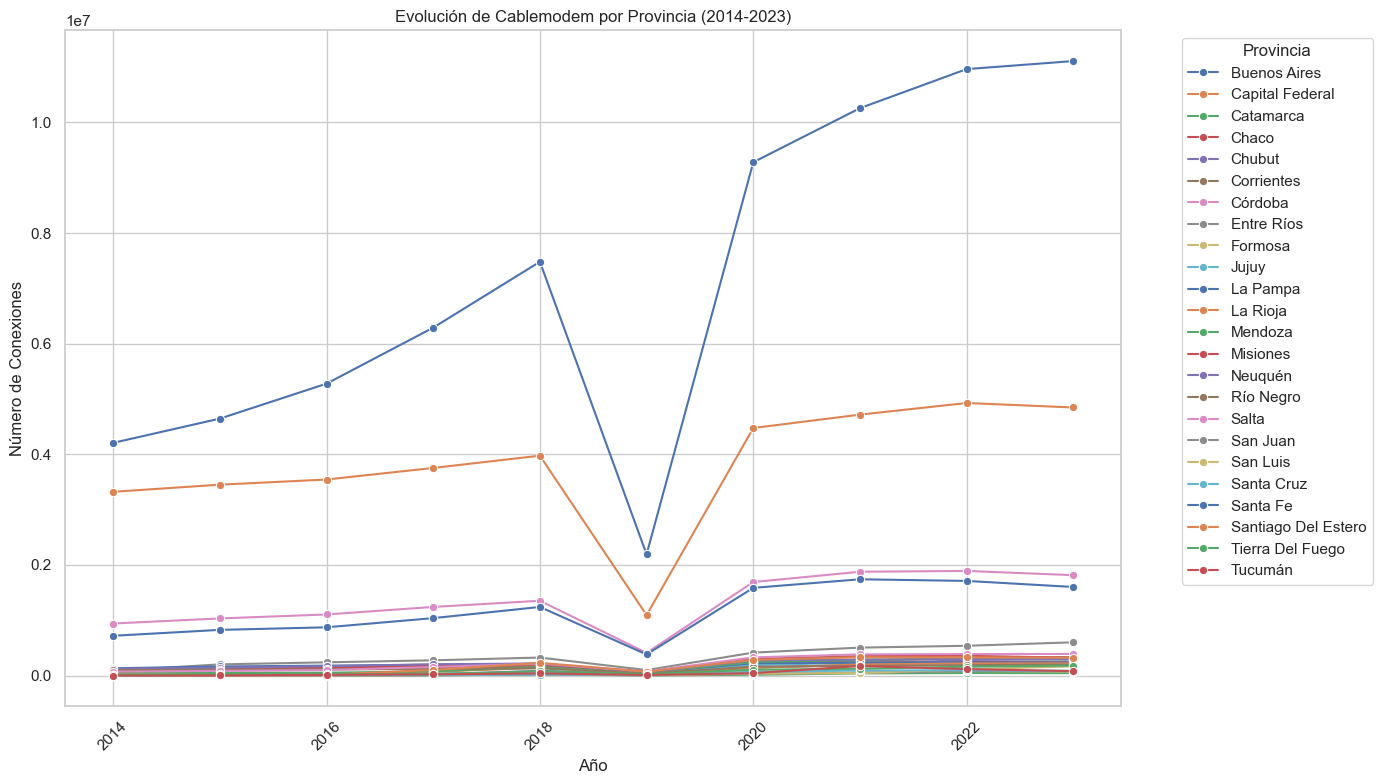

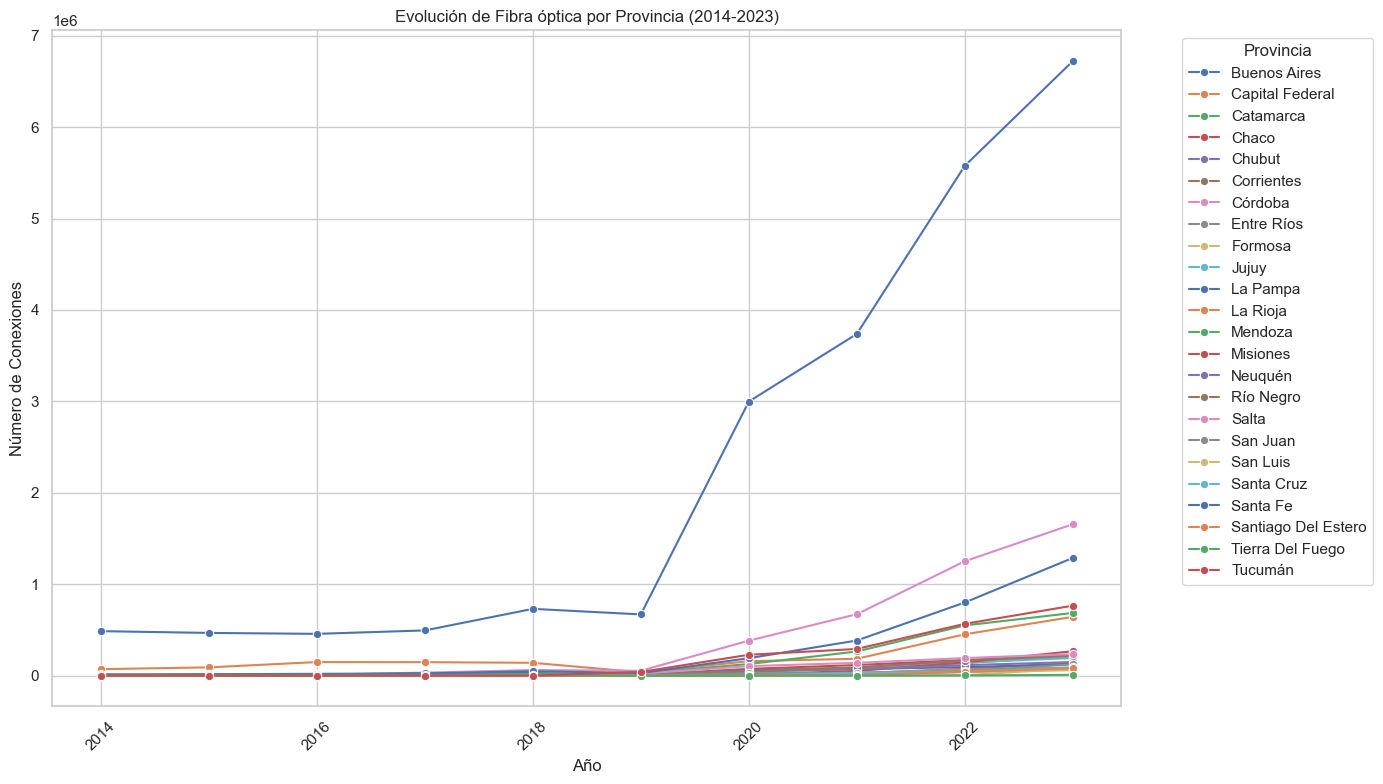

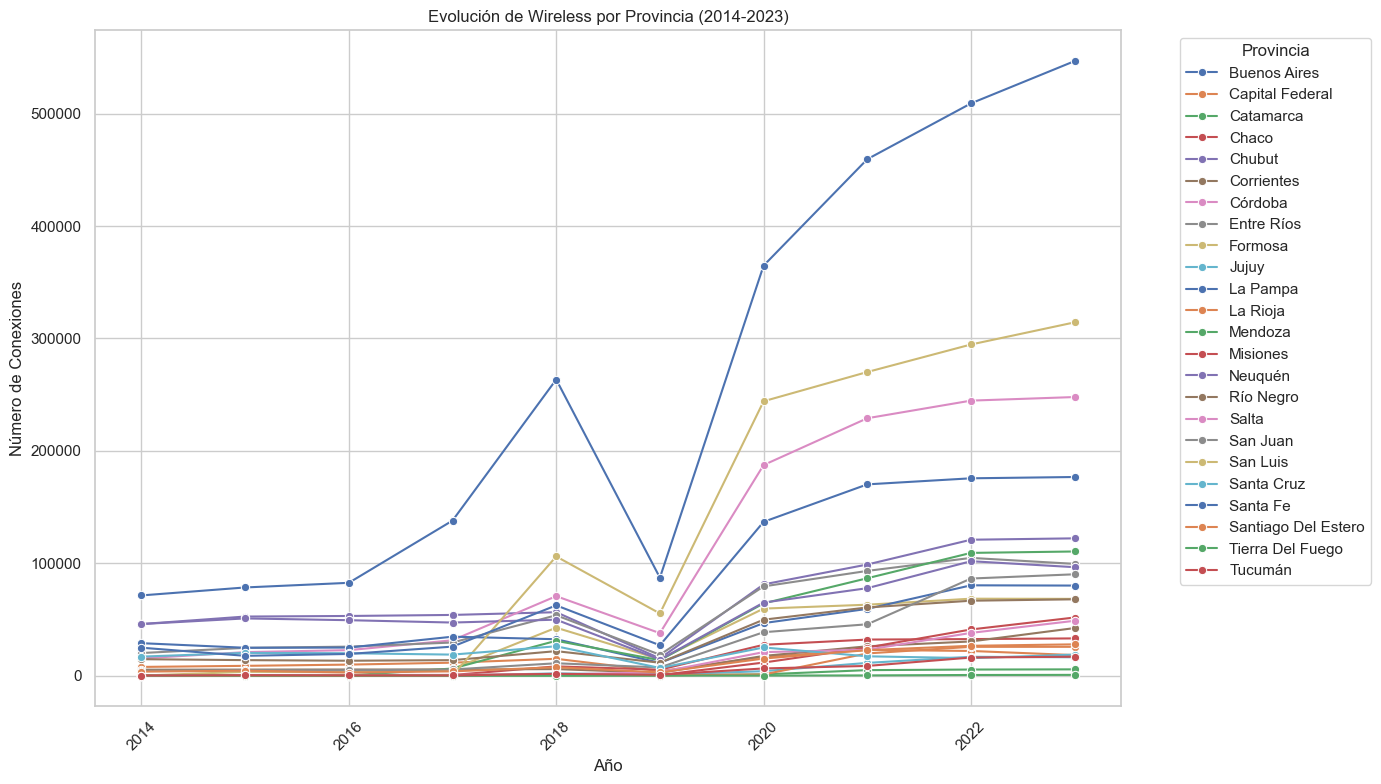

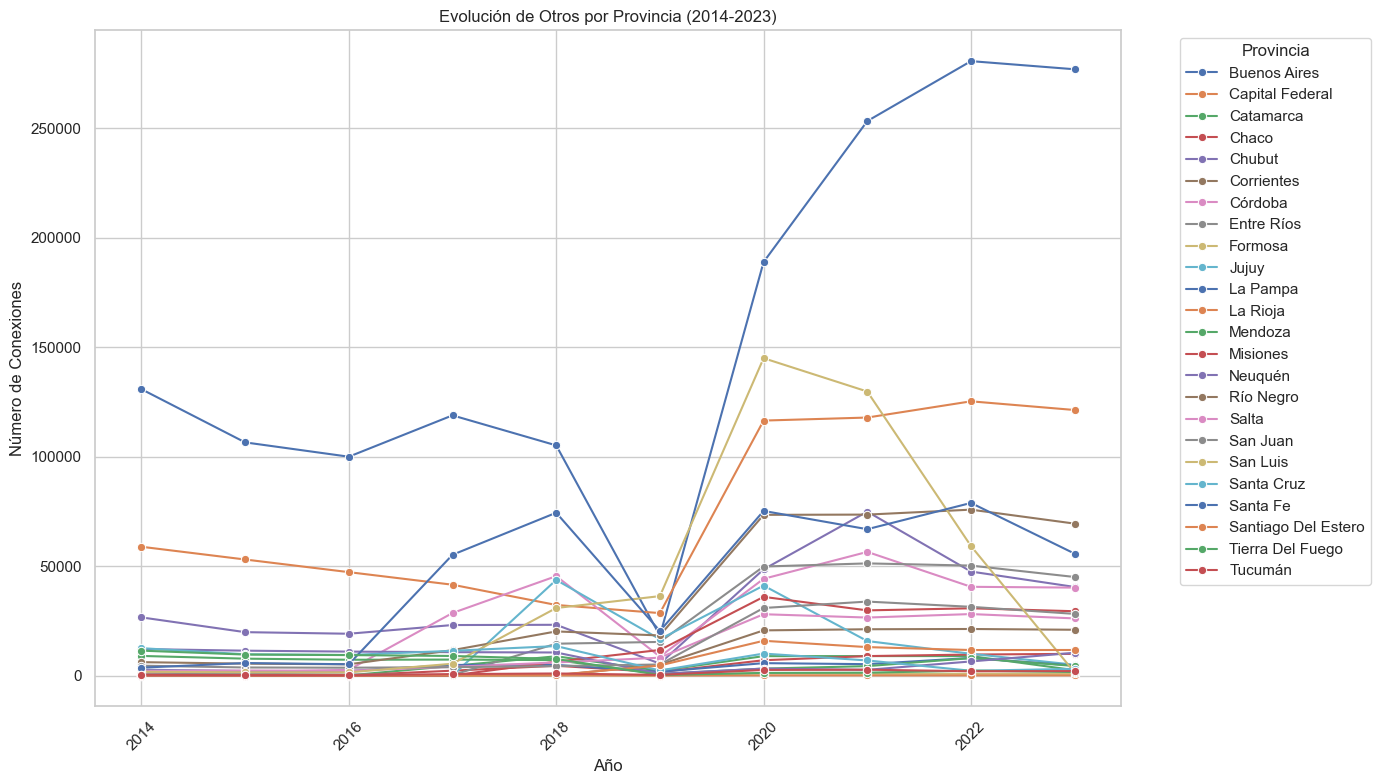

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
file_path = 'Internet.xlsx'
data = pd.read_excel(file_path, sheet_name='Accesos Por Tecnología')

# Limpiar la columna 'Año' para que solo contenga valores numéricos
data['Año'] = pd.to_numeric(data['Año'], errors='coerce')
data = data.dropna(subset=['Año'])
data['Año'] = data['Año'].astype(int)

# Sumar el primer trimestre de 2024 a los datos del 2023
data_2024 = data[(data['Año'] == 2024) & (data['Trimestre'] == 1)]
data_2023 = data[data['Año'] == 2023]

# Agrupar y sumar las conexiones del primer trimestre de 2024 al 2023
for tech in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']:
    data_2023[tech] += data_2024.groupby('Provincia')[tech].sum()

# Eliminar el año 2024 para evitar duplicados o inconsistencias
data = data[data['Año'] != 2024]

# Añadir las filas modificadas del 2023 al dataset original
data.update(data_2023)

# Lista de tecnologías
technologies = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

# Crear un gráfico de líneas para cada tecnología
for tech in technologies:
    plt.figure(figsize=(14, 8))
    
    # Agrupar y sumar por año y provincia para cada tecnología
    grouped_data = data.groupby(['Año', 'Provincia'])[tech].sum().unstack().fillna(0)
    
    # Graficar la evolución
    for province in grouped_data.columns:
        sns.lineplot(data=grouped_data, x=grouped_data.index, y=province, marker='o', label=province)
    
    plt.title(f'Evolución de {tech} por Provincia (2014-2023)')
    plt.xlabel('Año')
    plt.ylabel('Número de Conexiones')
    plt.xticks(rotation=45)
    plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Análisis y conclusiones para cada tecnología por separado.

1. ADSL
ADSL muestra una tendencia general a la baja en la mayoría de las provincias, con algunas fluctuaciones. Buenos Aires lidera en número de conexiones, pero también presenta una caída significativa en los últimos años.
La disminución en las conexiones de ADSL podría estar vinculada a la transición a tecnologías más avanzadas, como la fibra óptica.
Las provincias más pequeñas parecen tener un uso constante, aunque bajo, de ADSL, lo que indica una posible falta de actualización de infraestructura en estas áreas.

La tecnología ADSL está siendo reemplazada progresivamente por opciones más modernas en provincias con mayor desarrollo tecnológico e infraestructura.
Es probable que ADSL continúe en declive a medida que más provincias inviertan en tecnologías más nuevas y rápidas.

2. Cablemodem
Cablemodem muestra un crecimiento constante en las principales provincias, especialmente en Buenos Aires y Capital Federal. Sin embargo, hay una notable caída en algunos años, lo que podría estar relacionado con la migración a otras tecnologías.
La adopción de esta tecnología es alta en provincias con una mayor densidad poblacional y mejor infraestructura.
El crecimiento es menos pronunciado en provincias más pequeñas, sugiriendo un acceso desigual a esta tecnología.

Cablemodem sigue siendo una tecnología relevante, pero está enfrentando competencia con tecnologías más avanzadas, como la fibra óptica.
Las provincias con menor adopción pueden estar experimentando limitaciones en la infraestructura necesaria para soportar Cablemodem.

3. Fibra Óptica
La fibra óptica muestra un crecimiento exponencial, especialmente en Buenos Aires y Capital Federal. Esto indica una fuerte inversión en esta tecnología.
Las provincias que no adoptaron la fibra óptica en los primeros años muestran un aumento en los últimos años, lo que indica una expansión reciente de esta tecnología.
La variabilidad entre provincias refleja la disparidad en la disponibilidad de infraestructura avanzada.

La fibra óptica es la tecnología de acceso a internet que está creciendo más rápidamente en Argentina, especialmente en áreas urbanas.
Es probable que continúe reemplazando tecnologías más antiguas como ADSL y Cablemodem en los próximos años.

4. Wireless
La tecnología Wireless muestra un crecimiento gradual en la mayoría de las provincias, con Buenos Aires y algunas otras provincias mostrando picos significativos.
Esta tecnología es utilizada de manera más consistente en provincias con menos infraestructura para tecnologías cableadas.
Los datos sugieren que Wireless es una tecnología complementaria en áreas donde las opciones cableadas no son viables.
Wireless sigue siendo una opción importante en áreas rurales o donde la infraestructura cableada es menos accesible.
Podría continuar creciendo en estas áreas, pero es menos probable que compita con tecnologías como la fibra óptica en áreas más urbanizadas.

5. Otros
La categoría "Otros" muestra variabilidad en la adopción a lo largo de los años, con algunos picos notables, especialmente en Buenos Aires.
La categoría incluye tecnologías menos comunes o emergentes, lo que puede explicar la variabilidad y los picos en ciertos momentos.
La adopción en provincias es generalmente baja comparada con las tecnologías principales.

Las tecnologías categorizadas como "Otros" probablemente incluyen soluciones específicas o nuevas que están comenzando a ser adoptadas.
Podría ser interesante observar esta categoría en el futuro para identificar tendencias emergentes.

c:\Users\germa\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\germa\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


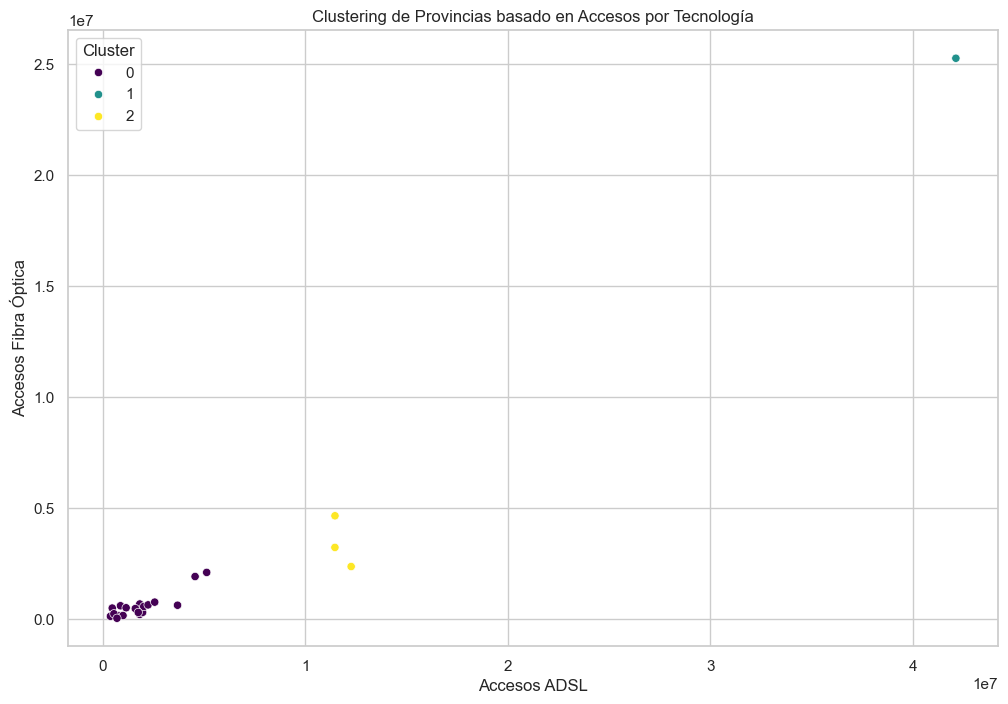

Provincias en el Cluster 0:
['Catamarca' 'Chaco' 'Chubut' 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy'
 'La Pampa' 'La Rioja' 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta'
 'San Juan' 'San Luis' 'Santa Cruz' 'Santiago Del Estero'
 'Tierra Del Fuego' 'Tucumán']


Provincias en el Cluster 1:
['Buenos Aires']


Provincias en el Cluster 2:
['Capital Federal' 'Córdoba' 'Santa Fe']




In [60]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
file_path = 'Internet.xlsx'
data = pd.read_excel(file_path, sheet_name='Accesos Por Tecnología')

# Seleccionar las variables de interés (suma total de accesos por tecnología por provincia)
data_cluster = data.groupby('Provincia').agg({
    'ADSL': 'sum',
    'Cablemodem': 'sum',
    'Fibra óptica': 'sum',
    'Wireless': 'sum',
    'Otros': 'sum'
}).reset_index()

# Normalizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster.iloc[:, 1:])

# Aplicar K-means con un número de clústeres (ejemplo: 3)
kmeans = KMeans(n_clusters=3, random_state=42)
data_cluster['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualización de los clústeres
plt.figure(figsize=(12, 8))
sns.scatterplot(x='ADSL', y='Fibra óptica', hue='Cluster', data=data_cluster, palette='viridis')
plt.title('Clustering de Provincias basado en Accesos por Tecnología')
plt.xlabel('Accesos ADSL')
plt.ylabel('Accesos Fibra Óptica')
plt.show()

# Análisis adicional
for cluster in sorted(data_cluster['Cluster'].unique()):
    print(f"Provincias en el Cluster {cluster}:")
    print(data_cluster[data_cluster['Cluster'] == cluster]['Provincia'].values)
    print("\n")
